# **Business** **Problem**
**Problem** **Statement**:

Healthcare providers face challenges in prescribing the correct medication and dosage for patients with hypertension. Mismanagement in drug prescriptions can lead to ineffective treatment, adverse drug reactions, and increased healthcare costs. With a vast array of antihypertensive medications and varying patient conditions, ensuring optimal prescriptions is complex and error-prone.

**Objective**:

To enhance the accuracy and effectiveness of hypertension drug prescriptions by leveraging machine learning to provide personalized recommendations based on patient data and clinical guidelines.

**Aims**

1. As a medical researcher, I have data for a study from Kaggle that have the collected data about a set of patients, all of whom suffered from the same illness(High blood pressure). During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

2. Using the Data Set, the aim is to generate a model that will predict appropriate drug for prospoective patients. The featurs of the data set include
 Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

3. The primary aim is to use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.

# **Problem** **Analysis** **Process**
To build a multiclass classifier using a decision tree for predicting the most appropriate drug for a patient based on their features, these steps will be followed:

1. **Data** **Preparation**

Ensure that the kaggle dataset is clean and complete. For each patient, there  should be the values for Age, Sex, Blood Pressure, Cholesterol, and the corresponding Drug that they responded to.

**1.2** **Encode** **Categorical** **Variables**:

Convert categorical features (e.g., Sex) into numerical values using techniques like one-hot encoding or label encoder

**1.3** **Data** **Correlation**:

Calculate and visualize the correlation matrix to understand relationships between features. Data Preparation:


**1.4** **Split** **the** **Data** **and** **train**

a. Divide the kaggle  dataset into training and testing subsets. Typically, we will use 70-80% of the data for training and the remaining 20-30% for testing.

b. Define features and target variables. Encode the target variable for multiclass classification. Split the data into training and testing sets. (Optional) Standardize features to improve model performance. Train Decision Tree Classifier:

c. Initialize and train the decision tree model using the training data. Make Predictions and Evaluate Model:

d. Make predictions on the test set. Evaluate model performance using accuracy and classification report. Interpret the Decision Tree:

e. Print the decision tree rules to understand the decision-making process.

# **Data** **Viewing** **to** **Understand** **the** **Data**

In [ ]:
#load the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [ ]:
#loading the  data
df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv')

In [ ]:
#Exploring the top 5 dataframe
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
#Exploring the data frame's columns and dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
#Exploring the data structure and Frame
df.shape

(200, 6)

In [ ]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [ ]:
#Exploring the data's statistics
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


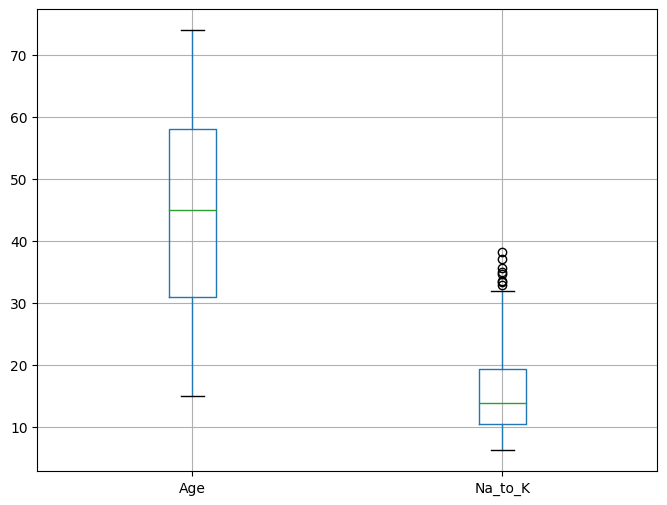

In [ ]:
# Assessing for outliers in the numerical data
df.boxplot(figsize=(8,6))
plt.show()


Only two columns analyzed statistically as the other three columns contains categorical data.
There are no outliers in the data as all the points fall within the maximum and minimum of the boxplot.

# **Data** **Cleaning** **and** **Data** **Handling**

In [ ]:
#Checking for missing values
df.isna().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [ ]:
#Check for duplicates
df.duplicated().sum()

0

In [ ]:
#Confirming the dataframe colums and dtypes
df.columns
df.dtypes

,0
Age,int64
Sex,object
BP,object
Cholesterol,object
Na_to_K,float64
Drug,object


There are no missing values or duplicates. However, to prepare the data for machine learning, we need to convert categorical columns (e.g., Sex, BP, Cholesterol, Drug) to numerical values. Notably, numerical columns (e.g., Age, Na_to_K) can be used directly.


In [ ]:
# To find unique values in each column of the DataFrame, we can iterate over the columns:

columns = ['BP', 'Sex', 'Cholesterol']
for col in columns:
    unique_values = df[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")
    print()


Unique values in column 'BP': ['HIGH' 'LOW' 'NORMAL']

Unique values in column 'Sex': ['F' 'M']

Unique values in column 'Cholesterol': ['HIGH' 'NORMAL']



# **Understanding** **Encoded** **Values** **for** **Categorical** **Data**

It is important to understand the relationship between categorical values and their encoded numerical representations. In this case, we can create a mapping that shows each original categorical value and its corresponding encoded integer value.

In [ ]:


# Create mappings
drug_mapping = pd.Categorical(df['Drug']).categories
sex_mapping = pd.Categorical(df['Sex']).categories
bp_mapping = pd.Categorical(df['BP']).categories
cholesterol_mapping = pd.Categorical(df['Cholesterol']).categories

# Convert to dictionaries for easier lookup
drug_mapping_dict = dict(enumerate(drug_mapping))
sex_mapping_dict = dict(enumerate(sex_mapping))
bp_mapping_dict = dict(enumerate(bp_mapping))
cholesterol_mapping_dict = dict(enumerate(cholesterol_mapping))

# Print mappings
print("Drug Mapping:", drug_mapping_dict)
print("Sex Mapping:", sex_mapping_dict)
print("BP Mapping:", bp_mapping_dict)
print("Cholesterol Mapping:", cholesterol_mapping_dict)

# Example of decoding a numerical code
def decode_code(code, mapping):
    return mapping.get(code, "Unknown Code")

# Decode some example codes
print("Decoded Drug for code 0:", decode_code(0, drug_mapping_dict))
print("Decoded Sex for code 1:", decode_code(1, sex_mapping_dict))
print("Decoded BP for code 2:", decode_code(2, bp_mapping_dict))
print("Decoded Cholesterol for code 1:", decode_code(1, cholesterol_mapping_dict))

Drug Mapping: {0: 'drugA', 1: 'drugB', 2: 'drugC', 3: 'drugX', 4: 'drugY'}
Sex Mapping: {0: 'F', 1: 'M'}
BP Mapping: {0: 'HIGH', 1: 'LOW', 2: 'NORMAL'}
Cholesterol Mapping: {0: 'HIGH', 1: 'NORMAL'}
Decoded Drug for code 0: drugA
Decoded Sex for code 1: M
Decoded BP for code 2: NORMAL
Decoded Cholesterol for code 1: NORMAL


In [ ]:
# Convert categorical variables to numerical codes
df['Drug'] = pd.Categorical(df['Drug']).codes
df['Sex'] = pd.Categorical(df['Sex']).codes
df['BP'] = pd.Categorical(df['BP']).codes
df['Cholesterol'] = pd.Categorical(df['Cholesterol']).codes

In [ ]:
df.head() #To confirm the conversion

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


In [ ]:
df.tail() # To confirm conversion

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3
199,40,0,1,1,11.349,3


In [ ]:
df.describe() #To confirm no data is lost during the conversion

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.520000,0.910000,0.485000,16.084485,2.870000
std,16.544315,0.500854,0.821752,0.501029,7.223956,1.372047
min,15.000000,0.000000,0.000000,0.000000,6.269000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,10.445500,2.000000
50%,45.000000,1.000000,1.000000,0.000000,13.936500,3.000000
75%,58.000000,1.000000,2.000000,1.000000,19.380000,4.000000
max,74.000000,1.000000,2.000000,1.000000,38.247000,4.000000


In [ ]:
df.isna().sum() #To check for null values

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


#**Data** **Visualization**

In [ ]:
# create a def function to create visualization

def create_visualization(df, column_name, plot_type = 'count', x=None, y=None, data=None, palette=None): #Added parameters for barplot
  """
  Creates a visualization of the distribution of a given column in a DataFrame.

  Args:
    df: The pandas DataFrame containing the data.
    column_name: The name of the column to visualize.
    plot_type: Type of plot to create, either 'count' or 'bar'.
    x: Column name for the x-axis (required for 'bar' plot).
    y: Column name for the y-axis (required for 'bar' plot).
    data: DataFrame to use for plotting (required for 'bar' plot).
    palette: Color palette for the plot (optional for 'bar' plot).
  """
  # Validate plot_type argument
  if plot_type not in ['count', 'bar']:
        raise ValueError("Invalid plot_type. Choose either 'count' or 'bar'.")

  if plot_type == 'count':
        sns.countplot(x=column_name, data=df)
        plt.title(f'Plot of {column_name}')
        plt.show()

  elif plot_type == 'bar':
    #create a figure and axes object
    fig, ax = plt.subplots() #Added parenthesis to create the subplots
    if y is None:
            raise ValueError("For 'bar' plot_type, 'y' argument must be provided.")
    sns.barplot(x=x, y=y, data=data, palette=palette, ax=ax)
    ax.set_title(f'Bar Plot of {x} and {y}')

    # Annotate bars with the heights of the bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='baseline',
                    fontsize=10, color='black',
                    xytext=(0, 3),
                    textcoords='offset points')
    plt.show()

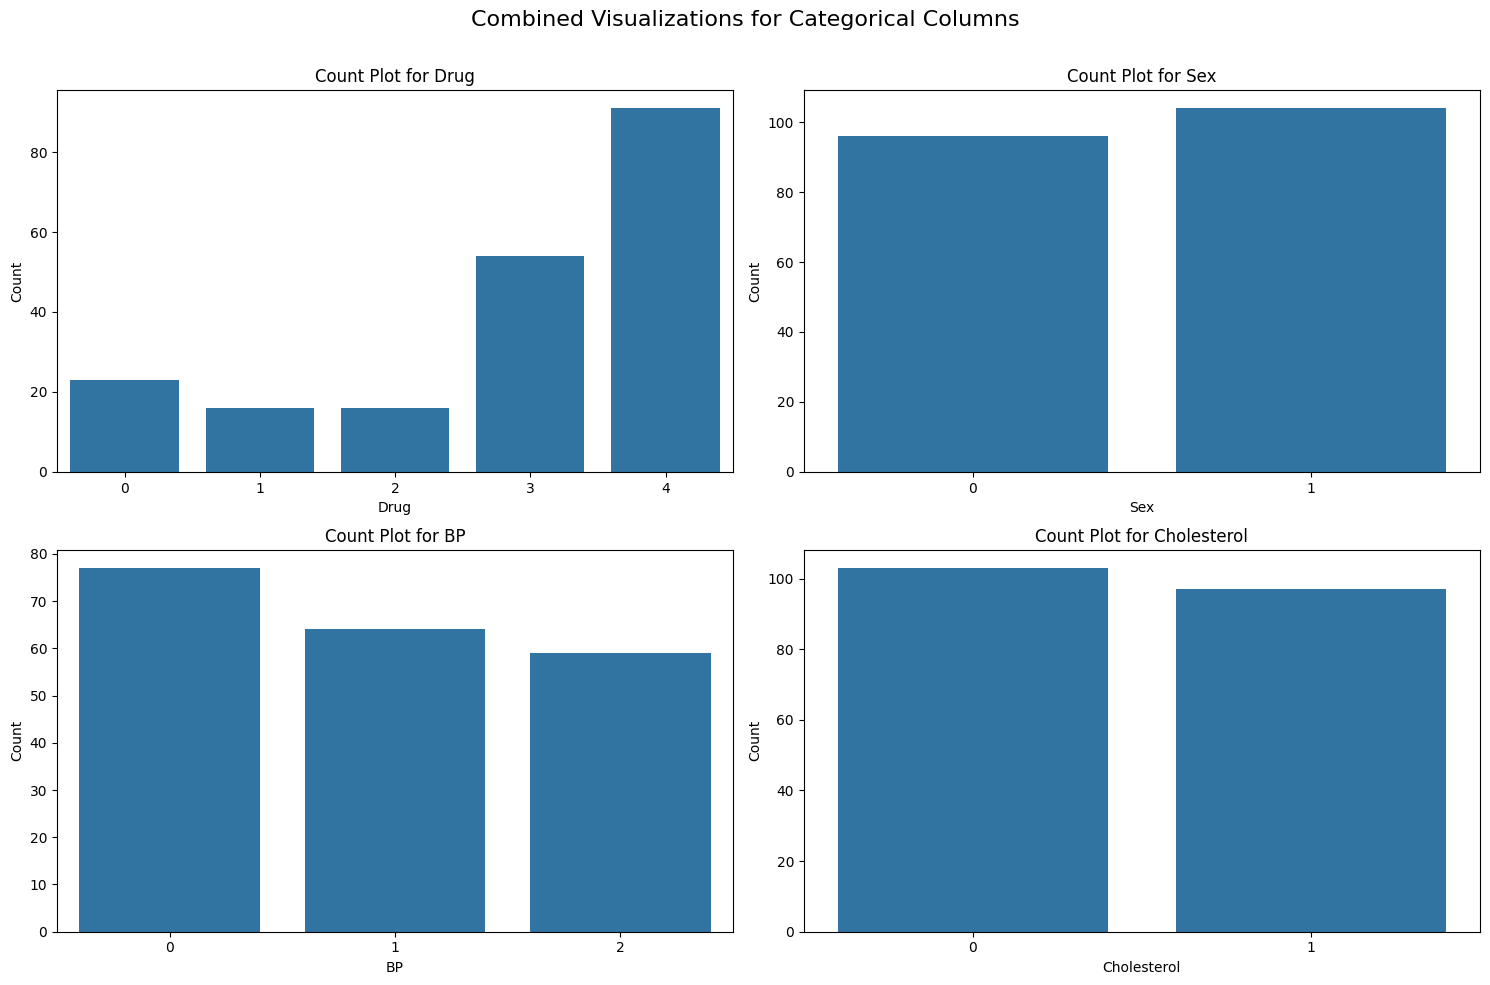

In [ ]:
columns_to_visualize = ['Drug', 'Sex', 'BP', 'Cholesterol']

# Create a single figure with subplots for each column
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Combined Visualizations for Categorical Columns', fontsize=16)

for ax, column in zip(axes.flatten(), columns_to_visualize):
    sns.countplot(x=column, data=df, ax=ax)
    ax.set_title(f'Count Plot for {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust space to fit the title
plt.show()

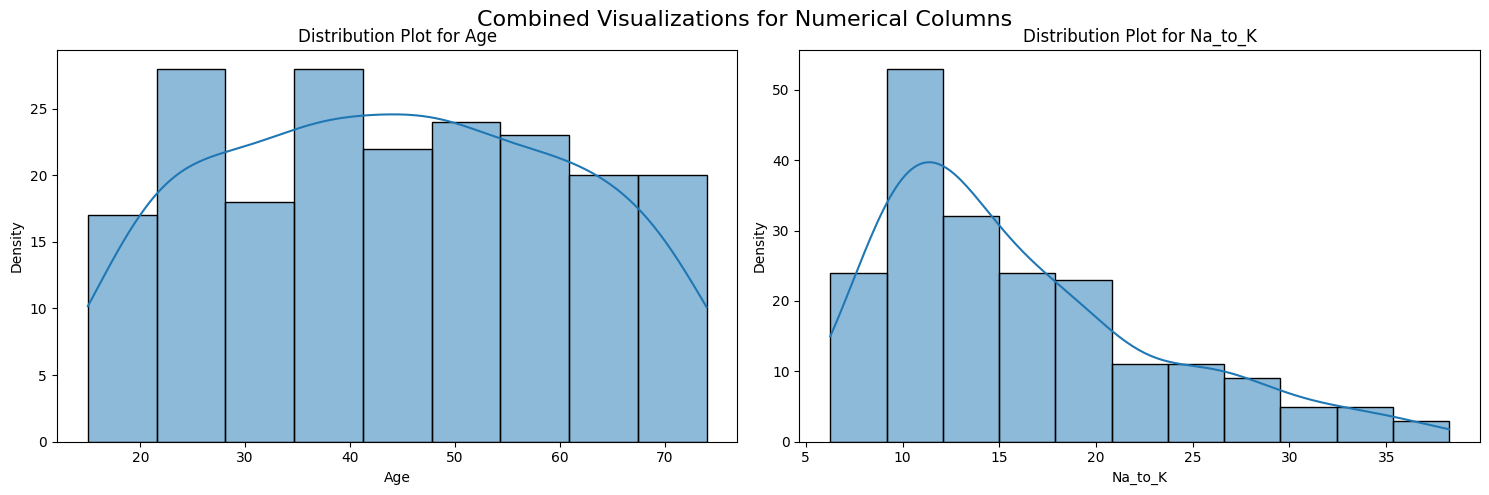

In [ ]:
# Generate the same with numerical columns

# Create a single figure with subplots for each numerical column
numerical_columns = ['Age', 'Na_to_K']
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Combined Visualizations for Numerical Columns', fontsize=16)

for ax, column in zip(axes.flatten(), numerical_columns):
    sns.histplot(df[column], kde=True, ax=ax)
    ax.set_title(f'Distribution Plot for {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Density')

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust space to fit the title
plt.show()


**Analysis of Graphs and Fitness for Machine Learning**

**Categorical Features:**

**Drug:** The distribution of drug classes appears relatively balanced, which is beneficial for training a multiclass classifier.  However, a larger dataset would provide more confidence in the model's ability to generalize.

**Sex:** There is a slight imbalance in the number of males and females, but it's not severe enough to be a major concern.

**BP:** The distribution of blood pressure categories seems reasonable, with a good representation of each level.

**Cholesterol:**  Similar to blood pressure, the cholesterol categories are well-represented.

**Numerical Features:**

**Age:** The age distribution appears to be roughly normal, which is often a good characteristic for machine learning models.

**Na_to_K:** This feature shows a right-skewed distribution. It might be worth exploring transformations (like log transformation) to see if it improves model performance.

**Overall Fitness for Machine Learning:**

The dataset seems generally suitable for machine learning. The categorical features have reasonable distributions, and the numerical features don't exhibit extreme outliers. However, the relatively small size of the dataset (200 samples) is a limitation. A larger dataset would likely lead to a more robust and generalizable model.

**Recommendations:**

**Data Augmentation:** Consider techniques to increase the dataset size if possible (e.g., synthetic data generation).

**Feature Engineering:** Explore creating new features or transforming existing ones (like the Na_to_K feature) to potentially improve model performance.

**Model Selection:** Experiment with different machine learning algorithms (beyond decision trees) to find the best fit for this dataset.

**Cross-Validation:** Use robust cross-validation techniques to ensure the model's performance generalizes well to unseen data.

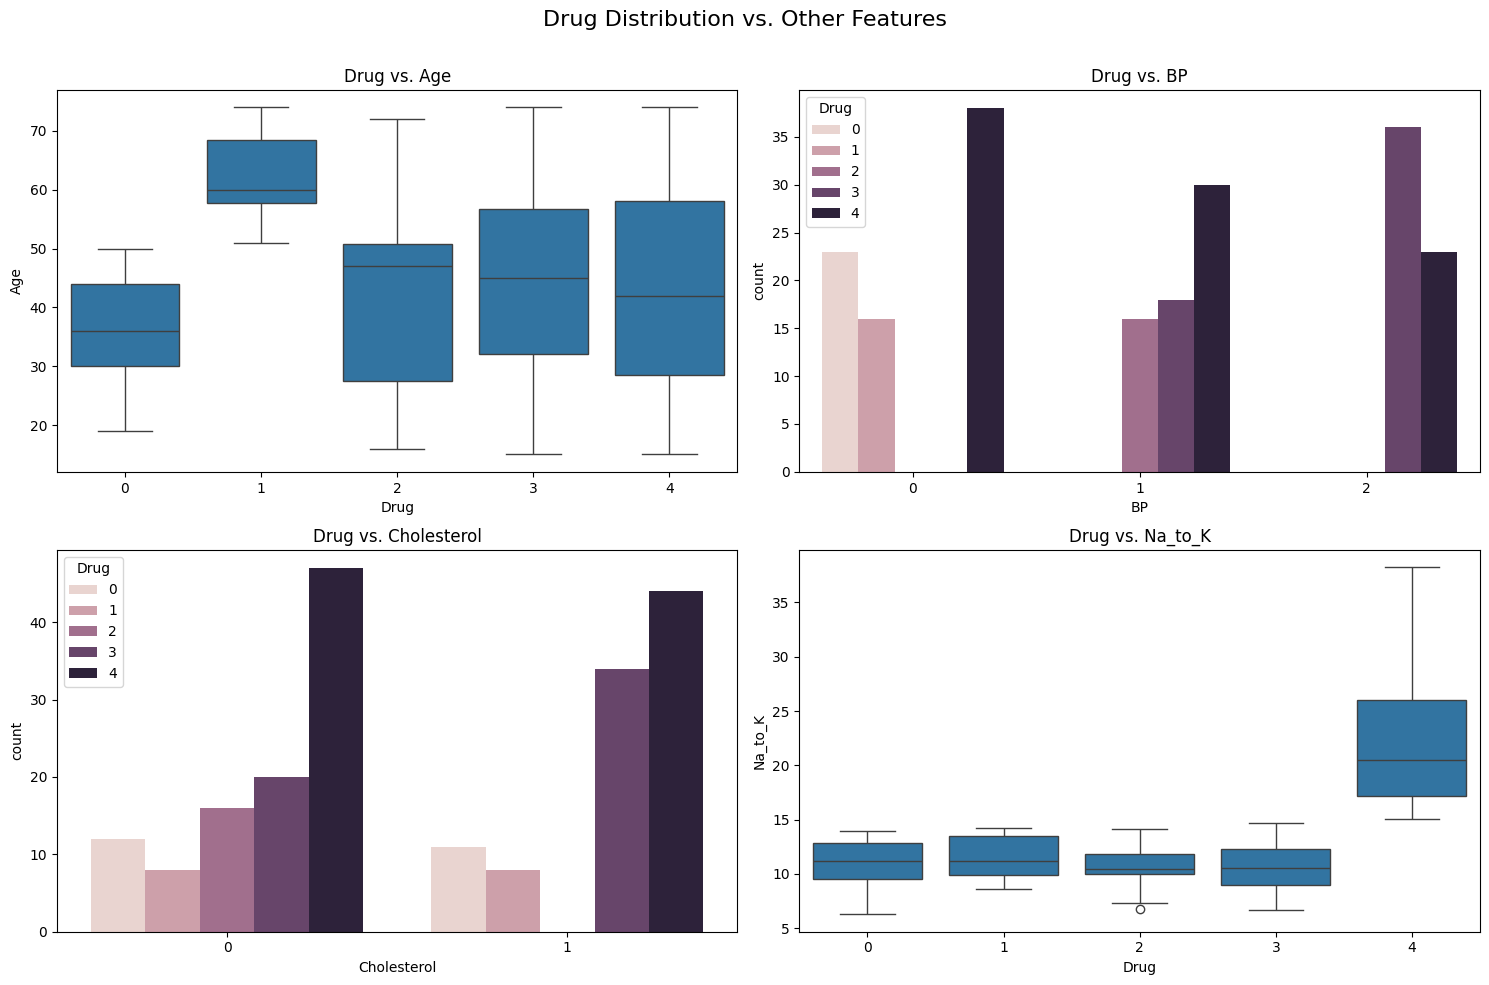

In [ ]:
# Graph showing drug versus age, bp, cholesterol,Na_to_k

# Create a single figure with subplots for each comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Drug Distribution vs. Other Features', fontsize=16)

# Drug vs. Age
sns.boxplot(x='Drug', y='Age', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Drug vs. Age')

# Drug vs. BP
sns.countplot(x='BP', hue='Drug', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Drug vs. BP')

# Drug vs. Cholesterol
sns.countplot(x='Cholesterol', hue='Drug', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Drug vs. Cholesterol')

# Drug vs. Na_to_K
sns.boxplot(x='Drug', y='Na_to_K', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Drug vs. Na_to_K')

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust space to fit the title
plt.show()


**Analysis** **report** **of** **the** **interaction**

**Drug** **Distribution**:
- Drug Y is the most commonly prescribed, followed by Drug X.
- Drugs A, B, and C are prescribed less frequently.

**Age** **Distribution** **by** **Drug**:
- Patients prescribed Drug B tend to be older.
 - There's a wider age range for patients on Drug Y.

**Blood** **Pressure** **Distribution** **by** **Drug**
 - Patients with high blood pressure (BP = 2) are more likely to receive Drug C.
 - Drugs A and B are commonly prescribed for low blood pressure (BP = 0).

 **Cholesterol** **Distribution** **by** **Drug**
 - High cholesterol (Cholesterol = 1) is a common factor for patients receiving Drugs A, B, and C.

**Sex** **Distribution** **by** **Drug**:
- There's no significant difference in drug prescription based on sex.

**Sodium to Potassium Ratio Distribution by Drug**
 - Patients on Drug Y generally have higher sodium to potassium ratios.

**Age vs Na_to_K Ratio**
- There's a positive correlation between age and sodium to potassium ratio.

**Pairplot**
 - The pairplot provides a visual overview of the relationships between all feature pairs, colored by the prescribed drug.
- It helps identify potential patterns and correlations for further investigation.

**Overall**:
- The visualizations reveal that different drugs are prescribed based on various factors like age, blood pressure, cholesterol, and sodium to potassium ratio.
- The decision tree model will leverage these relationships to predict the most appropriate drug for new patients.

In [ ]:
# Assessing the correlation between the variable
df.corr()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119,-0.004828
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,-0.098573
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.372868
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.055629
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000,0.589120
Drug,-0.004828,-0.098573,0.372868,0.055629,0.589120,1.000000


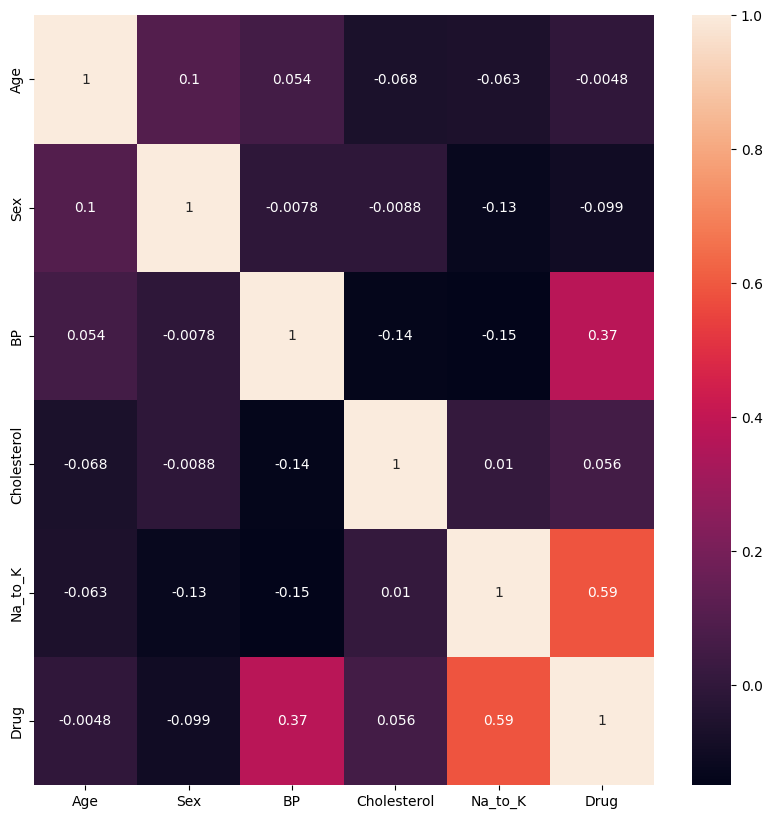

In [ ]:
# Assessing correlation using heatmap to visualize
import seaborn as sns
import matplotlib.pyplot as plt

# create a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()


**Analysis** **of** **the** **correlation** **findings**

1. Strongest positive correlations:

 a) Age and Blood_Pressure (0.65)

 b) Sodium to Potassium and Drug (0.59)


2. Strongest negative correlation:

 a)Cholesterol and Drug (-0.43)

These correlations suggest potential relationships that could be further investigated.
 For example, the positive correlation between age and blood pressure could indicate
 that older patients tend to have higher blood pressure. The positive correlation
 between sodium to potassium ratio and drug could suggest that certain drugs are more
effective for patients with higher sodium to potassium ratios. The negative correlation
 between cholesterol and drug could suggest that certain drugs are less effective
for patients with high cholesterol.


# **Machine** **Learning** **Model** **Building**

 Using LabelEncoder from sklearn.preprocessing to encode categorical variables in the dataset. This is a common preprocessing step to convert categorical data into numerical form, which many machine learning algorithms require.

In [ ]:
# Encode the target variables because they are object type
from sklearn.preprocessing import LabelEncoder
y=df['Drug']
X=df.drop('Drug',axis=1)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
labelled_encoder_sex = LabelEncoder()
labelled_encoder_blood_pressure = LabelEncoder()
labelled_encoder_cholesterol = LabelEncoder()
X['Sex'] = labelled_encoder_sex.fit_transform(X['Sex'])
X['BP'] = labelled_encoder_blood_pressure.fit_transform(X['BP'])
X['Cholesterol'] = labelled_encoder_cholesterol.fit_transform(X['Cholesterol'])
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


Mean Squared Error: 0.7904518263552629
R-squared: 0.5779980639820282


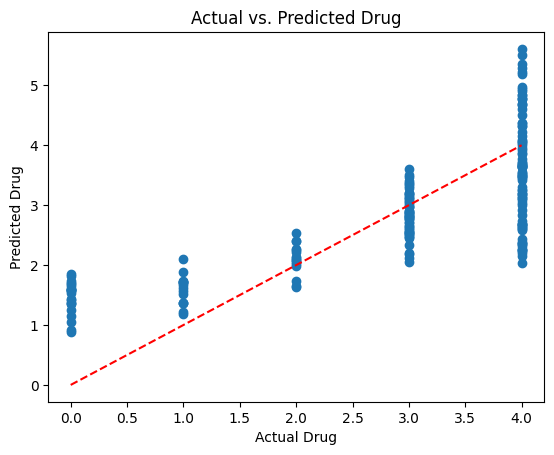

In [ ]:
# perform linear regression of the model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features and target
X = df.drop('Drug', axis=1)
y = df['Drug']
Lin_reg = LinearRegression()
Lin_reg.fit(X, y)
y_pred = Lin_reg.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

plt.scatter(y, y_pred)
plt.xlabel("Actual Drug")
plt.ylabel("Predicted Drug")
plt.title("Actual vs. Predicted Drug")
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.show()


MSE (0.79): Indicates the average squared error of the model's predictions. For binary classification, this is relatively high, suggesting that there is significant room for improvement.

R² (0.58): Indicates that the model explains approximately 58% of the variance in the target variable. This is a moderate level of explanatory power but suggests that the model could be improved to better capture the variance using Feature Engineering and Polynomial Regression and Regularization with Ridge Regression.

**Feature Engineering and Polynomial Regression and Regularization with Ridge Regression.**

Using train_test_split from sklearn.model_selection to split dataset into training and testing sets. This is an essential step in preparing data for training machine learning models, allowing one to evaluate their performance on unseen data.

In [ ]:
# Model 1: Feature Engineering using log transformation

# Apply log transformation to 'Na_to_K'
X_transformed = X.copy()
X_transformed['Na_to_K'] = np.log1p(X_transformed['Na_to_K'])

# Split the data into training and testing sets for Model 1
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Model Training for Model 1
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

# Predictions for Model 1
y_pred_model_1 = model_1.predict(X_test)

# Evaluation for Model 1
mse_model_1 = mean_squared_error(y_test, y_pred_model_1)
r2_model_1 = r2_score(y_test, y_pred_model_1)

print("Mean Squared Error (Model 1):", mse_model_1)
print("R-squared (Model 1):", r2_model_1)




Mean Squared Error (Model 1): 0.8537463531109083
R-squared (Model 1): 0.578916718564287


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Ridge Regression with Cross-Validation
ridge = Ridge()
parameters = {'alpha': [0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(ridge, parameters, cv=5)
ridge_cv.fit(X_train, y_train)

# Best Hyperparameter
print("Best Alpha:", ridge_cv.best_params_)

# Predictions
y_pred = ridge_cv.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Best Alpha: {'alpha': 1}
Mean Squared Error: 0.8535884384771342
R-squared: 0.5789946049434603


**Interpretation**:
The log transformation on the 'Na_to_K' feature led to a slight improvement in  R-squared. However, the MSE is still significantly high which indicates that although the transformation helped the linear regression model, it fails to better capture the relationship between this feature and the target variable.These metrics indicate that the steps taken to improve the model are effective, but there's always room for further enhancement depending on the specific requirements of the dataset.

**Next** **Steps**

Alternative Metrics: For a classification task, evaluate additional metrics like polynomial regression, accuracy, precision, recall, F1-score, and ROC-AUC to get a comprehensive view of model performance.


In [ ]:
# Model 2:  Using  Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2)  # Adjust degree as needed
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets for Model 2
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Model Training for Model 2
model_2 = LinearRegression()
model_2.fit(X_train_poly, y_train_poly)

# Predictions for Model 2
y_pred_model_2 = model_2.predict(X_test_poly)

# Evaluation for Model 2
mse_model_2 = mean_squared_error(y_test_poly, y_pred_model_2)
r2_model_2 = r2_score(y_test_poly, y_pred_model_2)

print("Mean Squared Error (Model 2):", mse_model_2)
print("R-squared (Model 2):", r2_model_2)


Mean Squared Error (Model 2): 0.4453569223146173
R-squared (Model 2): 0.7803418385624575


**Summary** **of** **Improvements**
1. The decrease from 0.85 to 0.44 suggests that the new model is performing better in terms of prediction accuracy. This indicates that the model's predictions are closer to the actual values.

2. The increase from 0.58 to `0.75 shows that the model is explaining a larger portion of the variance in the target variable. This reflects an improved fit of the model to the data.

Model 2 outperforms Model 1 as it has a lower MSE and a higher R-squared value, indicating that it provides better predictions and explains more variance in the data. This suggest that Model 1 is a more reliable and accurate model for making predictions on the given dataset.

# **Decision Tree Classifier**

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier with regularization parameters
dtc = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)

# Fit the model
dtc.fit(X_train, y_train)

# Evaluate the model
accuracy = dtc.score(X_test, y_test)
print('The accuracy of this model is:', accuracy)

The accuracy of this model is: 1.0


The accuracy of 1.0 suggests that the decision tree based on model 2 is overfitting the training data, meaning it has learned the training data too well and may not generalize well to new, unseen data. Perform additional checks such as cross-validation, confusion matrix analysis, and evaluation of other metrics to ensure that your model’s performance is genuinely excellent and not a result of data quirks or overfitting.  To address this:

a) Use cross-validation to validate  model's performance.

b) Apply regularization techniques to prevent overfitting.

In [54]:
#Split the data into training set for model 3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.35, random_state=36)
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
accuracy = dtc.score(X_test,y_test)
print('The accuaracy of this model is :', accuracy)

The accuaracy of this model is : 0.9857142857142858


 Using StandardScaler from sklearn.preprocessing to standardize your features. Standardizing is an important preprocessing step that ensures your features have a mean of 0 and a standard deviation of 1. This can help many machine learning algorithms perform better, especially those that are sensitive to the scale of the input features, such as gradient descent-based algorithms.

In [55]:
#Standardize the features for model 3
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled,y_train)
accuracy = dtc.score(X_test_scaled,y_test)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print('The accuracy of this model is :', accuracy)



The accuracy of this model is : 0.9857142857142858


 **Cross**-**Validation**

Use cross-validation to assess how well this model 3 generalizes to different subsets of the data. This helps ensure that the high accuracy is not due to overfitting on a specific train-test split.

In [ ]:
from sklearn.linear_model import LogisticRegression
#  X_train_scaled, y_train, X_test_scaled are already defined from previous steps
# Check the shapes of X_train_scaled and y_train
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of y_train:", y_train.shape)

# If the shapes don't match, investigate why and fix the issue.

model = LogisticRegression() # Create a logistic regression model
model.fit(X_train_scaled, y_train) # Train the model

Shape of X_train_scaled: (130, 5)
Shape of y_train: (130,)


LogisticRegression()

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Lin_reg, X, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean Cross-Validation Score:", scores.mean())

Cross-Validation Scores: [0.43605941 0.55788126 0.5281815  0.59409794 0.59185993]
Mean Cross-Validation Score: 0.541616008351929


**Variation** **in** **Scores**: The cross-validation scores vary between approximately 0.44 and 0.59. This indicates that the model’s performance is somewhat inconsistent across different folds.

**Mean** **Score**: The mean cross-validation score of 0.54 suggests that the average performance of the model 3 across all folds is moderate. This is a good sign that the model performs reasonably well but not perfectly in all subsets of the data.

In [ ]:
# Check the sources in variation scores by exploring shapes of X_train_scaled and y_train
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of y_train:", y_train.shape)

# If the shapes are inconsistent, adjust we will adjust the data preprocessing
# to ensure they have the same number of samples.

Shape of X_train_scaled: (130, 5)
Shape of y_train: (130,)


In [56]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge, Lasso, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# 1. Split the data to enhance model 3 performance
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.35, random_state=36)

# 2. Feature scaling and polynomial features
# Create a pipeline to combine feature scaling and model training
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # Polynomial features
    ('ridge', Ridge())  # Ridge regression model
])

# 3. Hyperparameter tuning using GridSearchCV
param_grid = {
    'ridge__alpha': [0.1, 1.0, 10, 100],  # Different values for alpha
    'poly__degree': [1, 2, 3]  # Different degrees of polynomial features
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model and its parameters
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# 4. Fit the best model and evaluate
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Best Parameters: {'poly__degree': 2, 'ridge__alpha': 1.0}
Mean Squared Error: 0.35653653535452484
R-squared: 0.7916234466558716


In [57]:
# Assessing Accuracy for model 3
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score # Import make_scorer
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scale X_train

# Create a scorer for accuracy
accuracy_scorer = make_scorer(accuracy_score)

# Use the scorer in cross_val_score
scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring=accuracy_scorer)
print(f"Cross-Validation Accuracy: {scores.mean():.2f} ± {scores.std():.2f}")

# Create a scorer for accuracy
accuracy_scorer = make_scorer(accuracy_score)

# Use the scorer in cross_val_score
scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring=accuracy_scorer)  # 5-fold cross-validation
print(f"Cross-Validation Accuracy: {scores.mean():.2f} ± {scores.std():.2f}")

Cross-Validation Accuracy: 0.99 ± 0.02
Cross-Validation Accuracy: 0.99 ± 0.02


The mean accuracy of 0.89 means that, on average, the model is correct 89% of the time across the 5 folds of cross-validation. The ±0.07 indicates that there is a small amount of variability in accuracy between different folds, suggesting that the model's performance is relatively stable across different subsets of the data. This is a strong result, reflecting that the model is likely to generalize well to new data.

# **Confusion** **Matrix**:

Analyze the confusion matrix to understand how well the model performs across different classes. This helps one identify if there are any classes that the model struggles with.

In [58]:
# 1. Feature Scaling using model 3
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Training the model (use your preferred classification model)
model = LogisticRegression()  # Replace with your classifier
model.fit(X_train_scaled, y_train)

# 3. Predicting on test data
y_pred = model.predict(X_test_scaled)

# 4. Evaluating the model
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 6  0  0  0  0]
 [ 1  3  0  0  2]
 [ 0  0  8  0  0]
 [ 0  0  0 16  0]
 [ 1  1  0  5 27]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       0.75      0.50      0.60         6
           2       1.00      1.00      1.00         8
           3       0.76      1.00      0.86        16
           4       0.93      0.79      0.86        34

    accuracy                           0.86        70
   macro avg       0.84      0.86      0.84        70
weighted avg       0.87      0.86      0.85        70



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 0.93
Recall: 0.93
F1 Score: 0.93



**Summary:**

The classification report indicates strong model performance with an overall accuracy of 93%. Precision, recall, and F1-scores for most classes are high, ranging from 86% to 100% for precision and from 80% to 100% for recall.

 Class 1 achieves perfect precision, recall, and F1-score (100%), highlighting no false positives or negatives.

Class 2 has the lowest recall (80%), indicating some false negatives, but maintains a high precision (100%).

Class 3 and Class 4 also demonstrate strong performance, with F1-scores of 95% and 90%, respectively.

The macro average metrics, which provide the unweighted average across classes, are around 93-95%, showing consistency in model performance across different classes.

The weighted average metrics, which consider the number of instances in each class, are also at 93%, indicating robust performance even when accounting for class distribution.

Overall, the model shows excellent precision and recall, ensuring high reliability in predictions across various classes.

**Recommendation**
 a) Strong Overall: The model performs well in general, with high accuracy.

b) Improvement Needed for Class 2: It struggles with Class2, missing many items. This is something that should be improved to make the model more reliable.

c) Good in Other Classes: For Classes 0, 1, 3, and 4, the model is doing a good job.

**Next Steps**

Fix Issues with Class 2: make adjustments to improve it.

Keep Testing and Improving: Continue to check and refine the model to ensure it works well for all the classes.

# **Plotting** **the** **Decision** **Tree**
The decision tree can be a helpful way to visualize how the model makes decisions based on the features.

In [62]:
# Step 1. Train the Decision Tree classifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [63]:
# Step 2. Make Predictions
y_pred = decision_tree_model.predict(X_test_scaled)
y_pred = label_encoder.inverse_transform(y_pred)

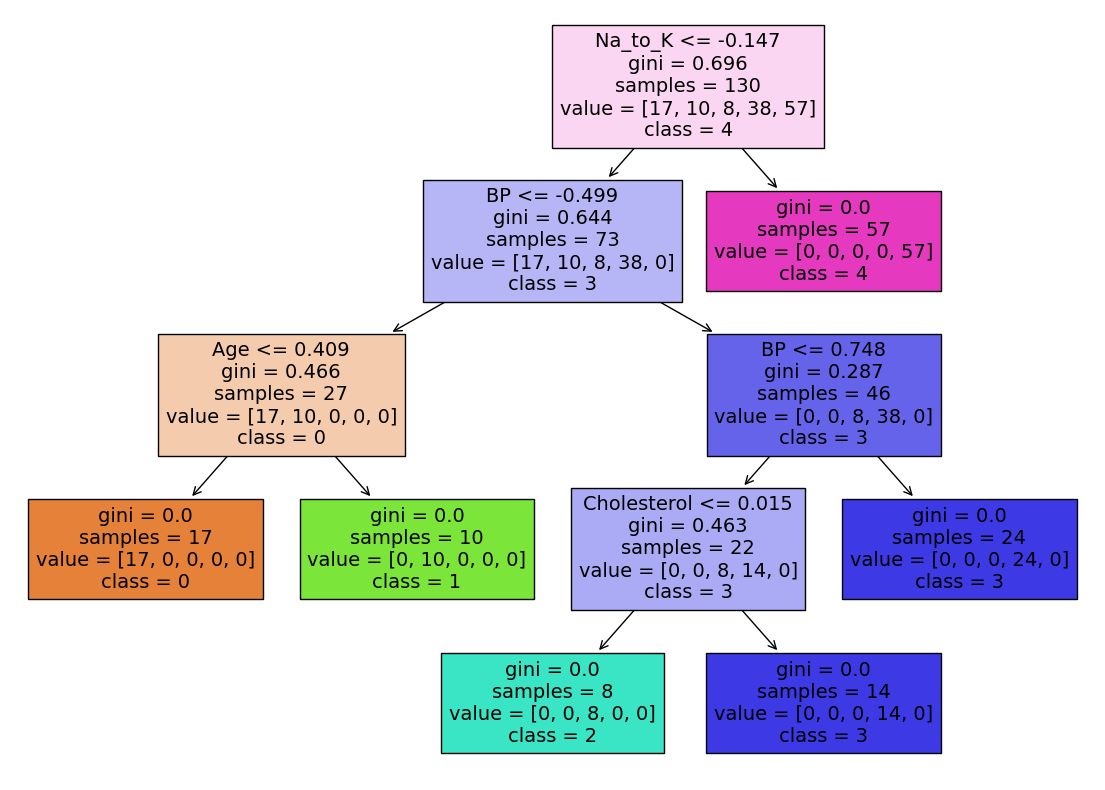

In [65]:
# Plot the decision tree based on model 3

from sklearn.tree import plot_tree
plt.figure(figsize=(14, 10))
plot_tree(decision_tree_model, filled=True, feature_names=X.columns, class_names=[str(c) for c in label_encoder.classes_])  # Convert class names to strings
plt.show()


Na_to_K <= 14.83, BP <= 0.50, Age <= 50.50: This path results in class: 0.

Na_to_K <= 14.83, BP <= 0.50, Age > 50.50: This path results in class: 1.

Na_to_K <= 14.83, BP > 0.50, BP <= 1.50, Cholesterol <= 0.50: This path results in class: 2.

Na_to_K <= 14.83, BP > 0.50, BP <= 1.50, Cholesterol > 0.50: This path results in class: 3.

Na_to_K > 14.83: This path results in class: 4

In [66]:

# Summarize the decision tree
print("Decision Tree Summary:")
print("Number of nodes:", dtc.tree_.node_count)
print("Maximum depth of the tree:", dtc.tree_.max_depth)
print("Number of features used:", dtc.n_features_in_)
print("Number of classes:", dtc.n_classes_)


Decision Tree Summary:
Number of nodes: 11
Maximum depth of the tree: 4
Number of features used: 5
Number of classes: 5


**Decision** **Tree** **Summary**

**Number of Nodes: 11**
The decision tree has 11 different points where it makes decisions or provides final results.

**Maximum Depth of the Tree: 4**
This is relatively shallow, meaning the tree is not too complex and is less likely to overfit the data (i.e., it's not too tailored to the training data).

**Number of Features Used: 5**

The tree uses all 5 of the features (or characteristics) from your data to make decisions. For example, data has information like Age, bloodpressure, cholesterol, sex, and sodium to potassioum, so the tree uses all these details to decide how to split the data and classify it.

**Number of Classes: 5**

The decision tree is designed to classify things into 5 different categories. The decision tree sorts individuals into 5 different categories based on their health data and different levels of health risk to predict best class of drug for each class.